In [119]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [120]:
print(os.listdir('input'))

['Volcanoes_test', 'Volcanoes_train']


In [121]:
label_names = ["No","Yes"]
df_train = pd.read_csv("input/volcanoes_train/train_images.csv",header=None)

df_test = pd.read_csv("input/volcanoes_test/test_images.csv",header=None)

print("Shapes training: ",df_train.shape)
print("Shapes test: ",df_test.shape)
df_test.head()


Shapes training:  (7000, 12100)
Shapes test:  (2734, 12100)


,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,107,116,108,101,107,109,108,110,100,109,...,111,110,109,109,101,106,106,117,130,134
1,93,95,98,100,90,100,108,98,90,103,...,86,93,59,88,89,89,92,99,92,113
2,108,108,92,116,116,140,126,104,112,103,...,118,111,113,107,107,121,141,160,131,138
3,165,164,156,159,151,120,103,114,114,116,...,69,96,109,91,94,83,48,69,86,75
4,105,106,84,115,121,103,94,108,103,91,...,92,89,96,89,91,102,99,90,90,73


In [122]:
df_train_labels = pd.read_csv("input/volcanoes_train/train_labels.csv")
df_test_labels = pd.read_csv("input/volcanoes_test/test_labels.csv")

df_train_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [123]:
#valores NaN
print(sum(df_train.isna().sum()))
print(sum(df_test.isna().sum()))

#print(df_train_labels.isna().sum())
#print(df_test_labels.isna().sum())

0
0


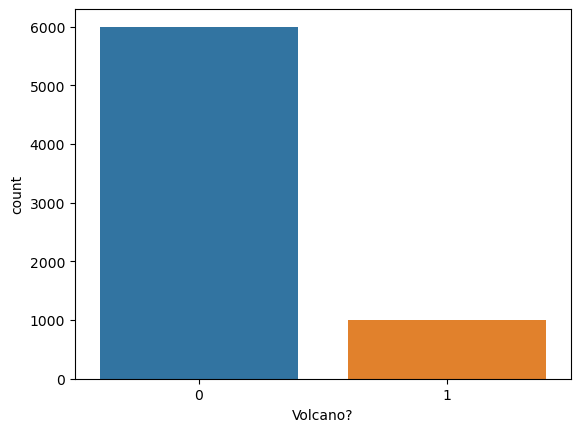

Total de imagens: 7000
Ground truth dos vulcões: 1000 (14.29%)
Dos que tem vulcões, 10.50% são definitivamente vulcões


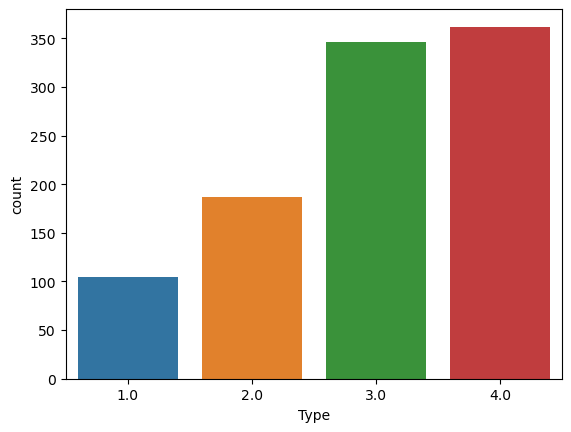

A maioria das imagens contém somente um vulcão


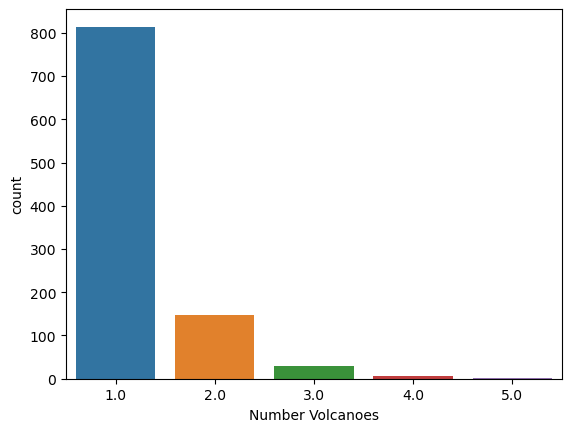

In [124]:
sns.countplot(data = df_train_labels,x="Volcano?")
plt.show()
trainVolcanoCount = df_train_labels[df_train_labels["Volcano?"] == 1].shape[0]
trainNotVolcanoCount = df_train_labels[df_train_labels["Volcano?"] == 0].shape[0]
imagesCount = len(df_train)
print("Total de imagens:", imagesCount)
print("Ground truth dos vulcões:", trainVolcanoCount, "(%s)" %"{:.2%}".format(((int(trainVolcanoCount))/imagesCount)))

trainVolcanoType1 = int(df_train_labels[df_train_labels["Type"] == 1].shape[0])

print("Dos que tem vulcões,", "{:.2%}".format(trainVolcanoType1/int(trainVolcanoCount)), "são definitivamente vulcões")
sns.countplot(data = df_train_labels,x="Type")
plt.show()
print("A maioria das imagens contém somente um vulcão")
sns.countplot(data = df_train_labels,x="Number Volcanoes")
plt.show()

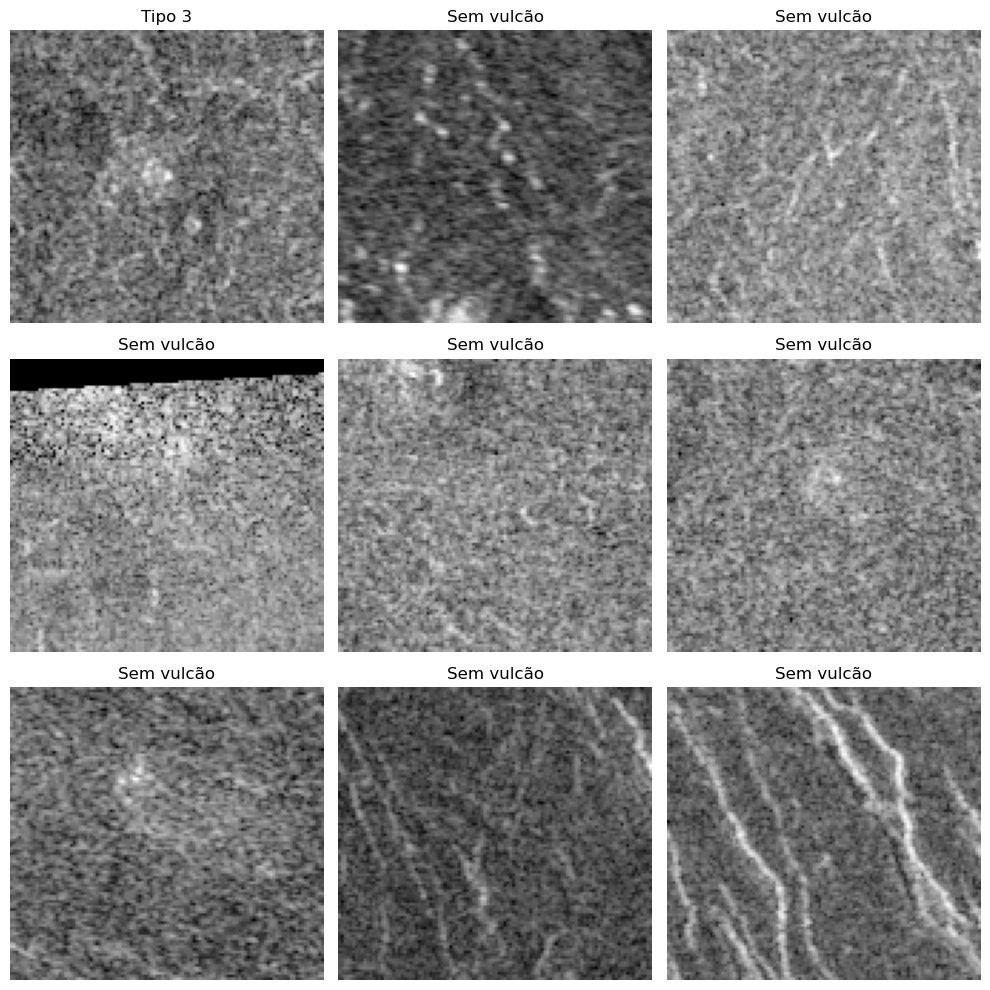

In [125]:

num_images_to_show = 9
selected_images = df_train.head(num_images_to_show)
selected_labels = df_train_labels.head(num_images_to_show)
# Definir as dimensões da imagem
image_height, image_width = 110, 110
# Converter as imagens para 2D e associar seus labels
images_2d_with_labels = selected_images.apply(lambda row: row.values.reshape(image_height, image_width), axis=1)

# Criar uma figura para exibir as imagens com seus tipos
fig, axes = plt.subplots(3, 3, figsize=(10, 10))


for ax, img, label in zip(axes.flatten(), images_2d_with_labels, selected_labels.iterrows()):
    label_data = label[1]
    volcano = label_data['Volcano?']
    if volcano == 1:
        volcano_type = int(label_data['Type'])
        title = f"Tipo {volcano_type}"
    else:
        title = "Sem vulcão"
        
    ax.imshow(img, cmap='gray', aspect='auto')
    ax.set_title(title)
    ax.axis('off')


plt.tight_layout()
plt.show()

In [126]:
# pixels_count = len(df_train) * 110 * 110
# pixels_values_sum = df_train.sum().sum()

# print("Mean: ", pixels_values_sum / pixels_count)

mean = df_train.mean().mean()
std = df_train.std().mean()
mean, std


(100.44605335301061, 25.664987012627073)

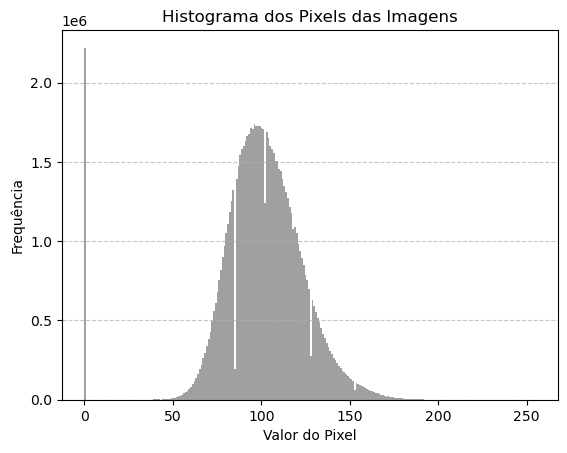

In [127]:
# Converter os dados das imagens em uma única série para calcular o histograma
pixel_values = df_train.values.flatten()

# Criar o histograma dos pixels
plt.hist(pixel_values, bins=256, range=(0, 255), color='gray', alpha=0.75)
plt.title('Histograma dos Pixels das Imagens')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o histograma
plt.show()